# Data Analysis and Visualisation - Games

This notebook is being used to analyse the "Popular Video Games 1980 - 2023" dataset to asssess its suitability to be used to develop a regression decision tree

https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023/data

# Privacy, Ethical and Licensing Considerations

**Privacy and ethical considerations with dataset** - none, no PII or identifiable user data included

**License** - "Database Contents License (DbCL) v1.0" https://opendatacommons.org/licenses/dbcl/1-0/

No non-commercial restrictions on use

# Objective & Hypothesis

Develop a regression decision tree that uses the class of properties for each game to predict the rating

The accuracy should increase as more games and properties are ingested into the model

# Setup

In [36]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Exploring the data

This dataset contains a list of video games dating from 1980 to 2023, it also provides things such as release dates, user review rating, and critic review rating

https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023/data

There are 14 columns

Index <br> 
Title <br>
Release Date (Date of release of the game's first version) <br>
Team (Game developer team) <br>
Rating <br>
Times Listed (Number of users who listed this game) <br>
Number of Reviews <br>
Genres <br>
Summary (Summary provided by the team) <br>
Reviews <br>
Plays (Number of users that have played the game before) <br>
Playing (Number of current users who are playing the game) <br>
Backlogs (Number of users who have access but haven't started with the game yet) <br>
Wishlist (Number of users who wish to play the game)

# Get the data

Dataset downloaded using the kaggle command line tool and placed in the local directory:

kaggle datasets download -d arnabchaki/popular-video-games-1980-2023


kaggle datasets download -d leonardopena/top-spotify-songs-from-20102019-by-year

unzip popular-video-games-1980-2023

The result is a file called "games.csv"

In [38]:
# create a pandas DataFrame called "games" containing the raw data

games = pd.read_csv('C:/Users/Mark/Documents/repos/group-coursework-ha/data/games_raw.csv')

In [39]:
# display the top five rows of the DataFrame for some initial analysis

games.head() 

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [40]:
# visual analysis of the dataframe

games

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


# Attribute Selection

Columns that can be removed

- **Index** - not necessary (can use dataframe indexing) <br> 
- **Release Date** - not relevant for predicting the rating <br>
- **Times Listed** - visually inspecting the dataframe the values in the 'Times Listed' and 'Number of Reviews' columns look identical <br>
- **Summary** - game description, doesn't impact rating <br>
- **Reviews** - could impact rating, would need some sort of sentiment analysis <br>
- **Backlogs** - doesn't correlate with a games rating as a backlog is for people who have never played <br>
- **Wishlist** - doesn't correlate with a games rating as a wishlist is for people who have never played

The games rating will be correlated against

- **Team** - some users may provide a better rating for a game as they like the game developer <br>
- **Number of reviews** - users who have reviewed the game are probably more likely to have given it a rating too <br>
- **Genres** - does a games genre impact its rating <br>
- **Plays** - how many players have tried the game? <br>
- **Playing** - how many active users does the game have? <br>
- **Active Users [NEW]** - how addictive is the game? how many of the players who have played the game are still playing it? This is a (weaker) indicator how how popular the game is

# Data Cleaning

In [41]:
# visually inspecting the dataframe the values in the 'Times Listed' and 'Number of Reviews' columns look identical
# if they are add 'Times Listed' to the list of columns to be deleted

games['Times Listed'].equals(games['Number of Reviews'])

True

In [42]:
# remove the columns not required for the decision tree model

games = games.drop(columns=['Unnamed: 0', 'Release Date', 'Times Listed', 'Summary', 'Reviews', 'Backlogs', 'Wishlist'])

In [43]:
# remove any duplicate rows in the dataframe

games = games.drop_duplicates()

In [44]:
# function to take the values in 'Number of Reviews', 'Plays' and 'Playing' columns and convert them into numeric values
# for example transform 3.9K into 3900, 3k into 3000

import re

def convert_k_to_number(text):
    pattern = r'(\d+(\.\d+)?)([Kk])'
    return re.sub(pattern, lambda match: str(int(float(match.group(1)) * 1000)) if match.group(3).lower() == 'k' else match.group(0), text)

# apply the conversion to the 'Times Listed', 'Number of Reviews', 'Plays', 'Playing' columns

games['Number of Reviews'] = games['Number of Reviews'].apply(convert_k_to_number)
games['Plays'] = games['Plays'].apply(convert_k_to_number)
games['Playing'] = games['Playing'].apply(convert_k_to_number)

In [45]:
# convert the columns to numeric format

games[['Number of Reviews', 'Plays', 'Playing']] = games[['Number of Reviews', 'Plays', 'Playing']].apply(pd.to_numeric)

In [46]:
# calculate the active users using the playing and plays columns

def calculate_active_users(row):
    try:
        return round(row['Playing'] / row['Plays'], 2)
    except ZeroDivisionError:
        return 0

games['Active Users'] = games.apply(calculate_active_users, axis=1)

In [47]:
# extract the Team in the first set of single/double quotes from the Team column
# for example ['Bandai Namco Entertainment', 'FromSoftware'] becomes Bandai Namco Entertainment
# some of the Team names are captured in single qoutes, some double quotes

games['Team'] = games['Team'].str.extract("['\"](.*?)['\"]")

In [48]:
# extract the Genre in the first set of single/double quotes from the Genre column
# for example ['Adventure', 'Brawler', 'Indie', 'RPG'] becomes Adventure
# some of the Genres names are captured in single qoutes, some double quotes

games['Genres'] = games['Genres'].str.extract("['\"](.*?)['\"]")

In [49]:
games

,Title,Team,Rating,Number of Reviews,Genres,Plays,Playing,Active Users
0,Elden Ring,Bandai Namco Entertainment,4.5,3900,Adventure,17000,3800,0.22
1,Hades,Supergiant Games,4.3,2900,Adventure,21000,3200,0.15
2,The Legend of Zelda: Breath of the Wild,Nintendo,4.4,4300,Adventure,30000,2500,0.08
3,Undertale,tobyfox,4.2,3500,Adventure,28000,679,0.02
4,Hollow Knight,Team Cherry,4.4,3000,Adventure,21000,2400,0.11
...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,Telltale Games,3.2,94,Adventure,763,5,0.01
1508,Team Sonic Racing,Sumo Digital,2.9,264,Arcade,1500,49,0.03
1509,Dragon's Dogma,Capcom,3.7,210,Brawler,1100,45,0.04
1510,Baldur's Gate 3,Larian Studios,4.1,165,Adventure,269,79,0.29


In [50]:
# check the regex has worked and not left any null/ values in the Team column

games['Team'].isnull().sum()

1

In [51]:
# as there is only 1 blank Team record and nothing suitable to replace it with, delete the record

games.dropna(subset='Team', inplace = True)

In [52]:
# check the regex has worked and not left any null/blank values in the Genres column

games['Genres'].isnull().sum()

3

In [53]:
# as there are only 3 blank Genre records and nothing suitable to replace them with, delete the records

games.dropna(subset='Genres', inplace = True)

In [54]:
# confirm none of the columns have any blank values, to help train the model

print(games.isnull().sum())

Title                 0
Team                  0
Rating               12
Number of Reviews     0
Genres                0
Plays                 0
Playing               0
Active Users          0
dtype: int64


In [55]:
# get mean of Rating column and round to 1 decimal place (consistent with other Rating values)

rating_mean = games["Rating"].mean()
rating_mean = round(rating_mean, 1)

# insert the Rating column's mean to all missing values in the column

games.Rating = games.Rating.fillna(rating_mean)

In [56]:
# confirm that no columns have null values

print(games.isnull().sum())

Title                0
Team                 0
Rating               0
Number of Reviews    0
Genres               0
Plays                0
Playing              0
Active Users         0
dtype: int64


In [57]:
games

,Title,Team,Rating,Number of Reviews,Genres,Plays,Playing,Active Users
0,Elden Ring,Bandai Namco Entertainment,4.5,3900,Adventure,17000,3800,0.22
1,Hades,Supergiant Games,4.3,2900,Adventure,21000,3200,0.15
2,The Legend of Zelda: Breath of the Wild,Nintendo,4.4,4300,Adventure,30000,2500,0.08
3,Undertale,tobyfox,4.2,3500,Adventure,28000,679,0.02
4,Hollow Knight,Team Cherry,4.4,3000,Adventure,21000,2400,0.11
...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,Telltale Games,3.2,94,Adventure,763,5,0.01
1508,Team Sonic Racing,Sumo Digital,2.9,264,Arcade,1500,49,0.03
1509,Dragon's Dogma,Capcom,3.7,210,Brawler,1100,45,0.04
1510,Baldur's Gate 3,Larian Studios,4.1,165,Adventure,269,79,0.29


# Data Analysis

In [58]:
# use the Pandas value counts function to count the frequency of some of the important columns

# check the distribution of the 'Rating' column as that is what will be predicted

games['Rating'].value_counts()

3.7    109
4.0     91
3.6     83
4.1     80
3.9     77
3.5     76
4.2     74
3.8     73
3.4     58
4.3     54
3.3     47
3.2     45
3.1     39
4.4     34
3.0     28
2.9     24
2.8     23
4.5     20
4.6     16
2.7     14
2.5     13
2.6      8
2.4      8
2.3      5
2.1      3
1.9      2
2.2      2
1.6      2
2.0      1
0.7      1
1.4      1
1.2      1
4.8      1
1.5      1
1.8      1
Name: Rating, dtype: int64

In [59]:
# check the distribution of the 'Genres' column

games["Genres"].value_counts()

Adventure             726
RPG                    79
Shooter                61
Arcade                 43
Fighting               38
Indie                  37
Platform               34
Brawler                26
Racing                 14
Card & Board Game      12
Simulator              12
Puzzle                 10
Sport                   7
Music                   6
Point-and-Click         3
Real Time Strategy      3
MOBA                    2
Strategy                1
Visual Novel            1
Name: Genres, dtype: int64

In [60]:
# show a statistical summary of the numerical attributes 

games.describe() 

,Rating,Number of Reviews,Plays,Playing,Active Users
count,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,3.661076,608.322870,4991.307623,187.219731,0.057677
std,0.535433,559.367416,4952.836075,320.170485,0.102883
min,0.700000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,234.500000,1500.000000,33.000000,0.010000
50%,3.700000,445.000000,3300.000000,82.000000,0.030000
75%,4.050000,785.000000,6800.000000,202.500000,0.060000
max,4.800000,4300.000000,33000.000000,3800.000000,1.570000


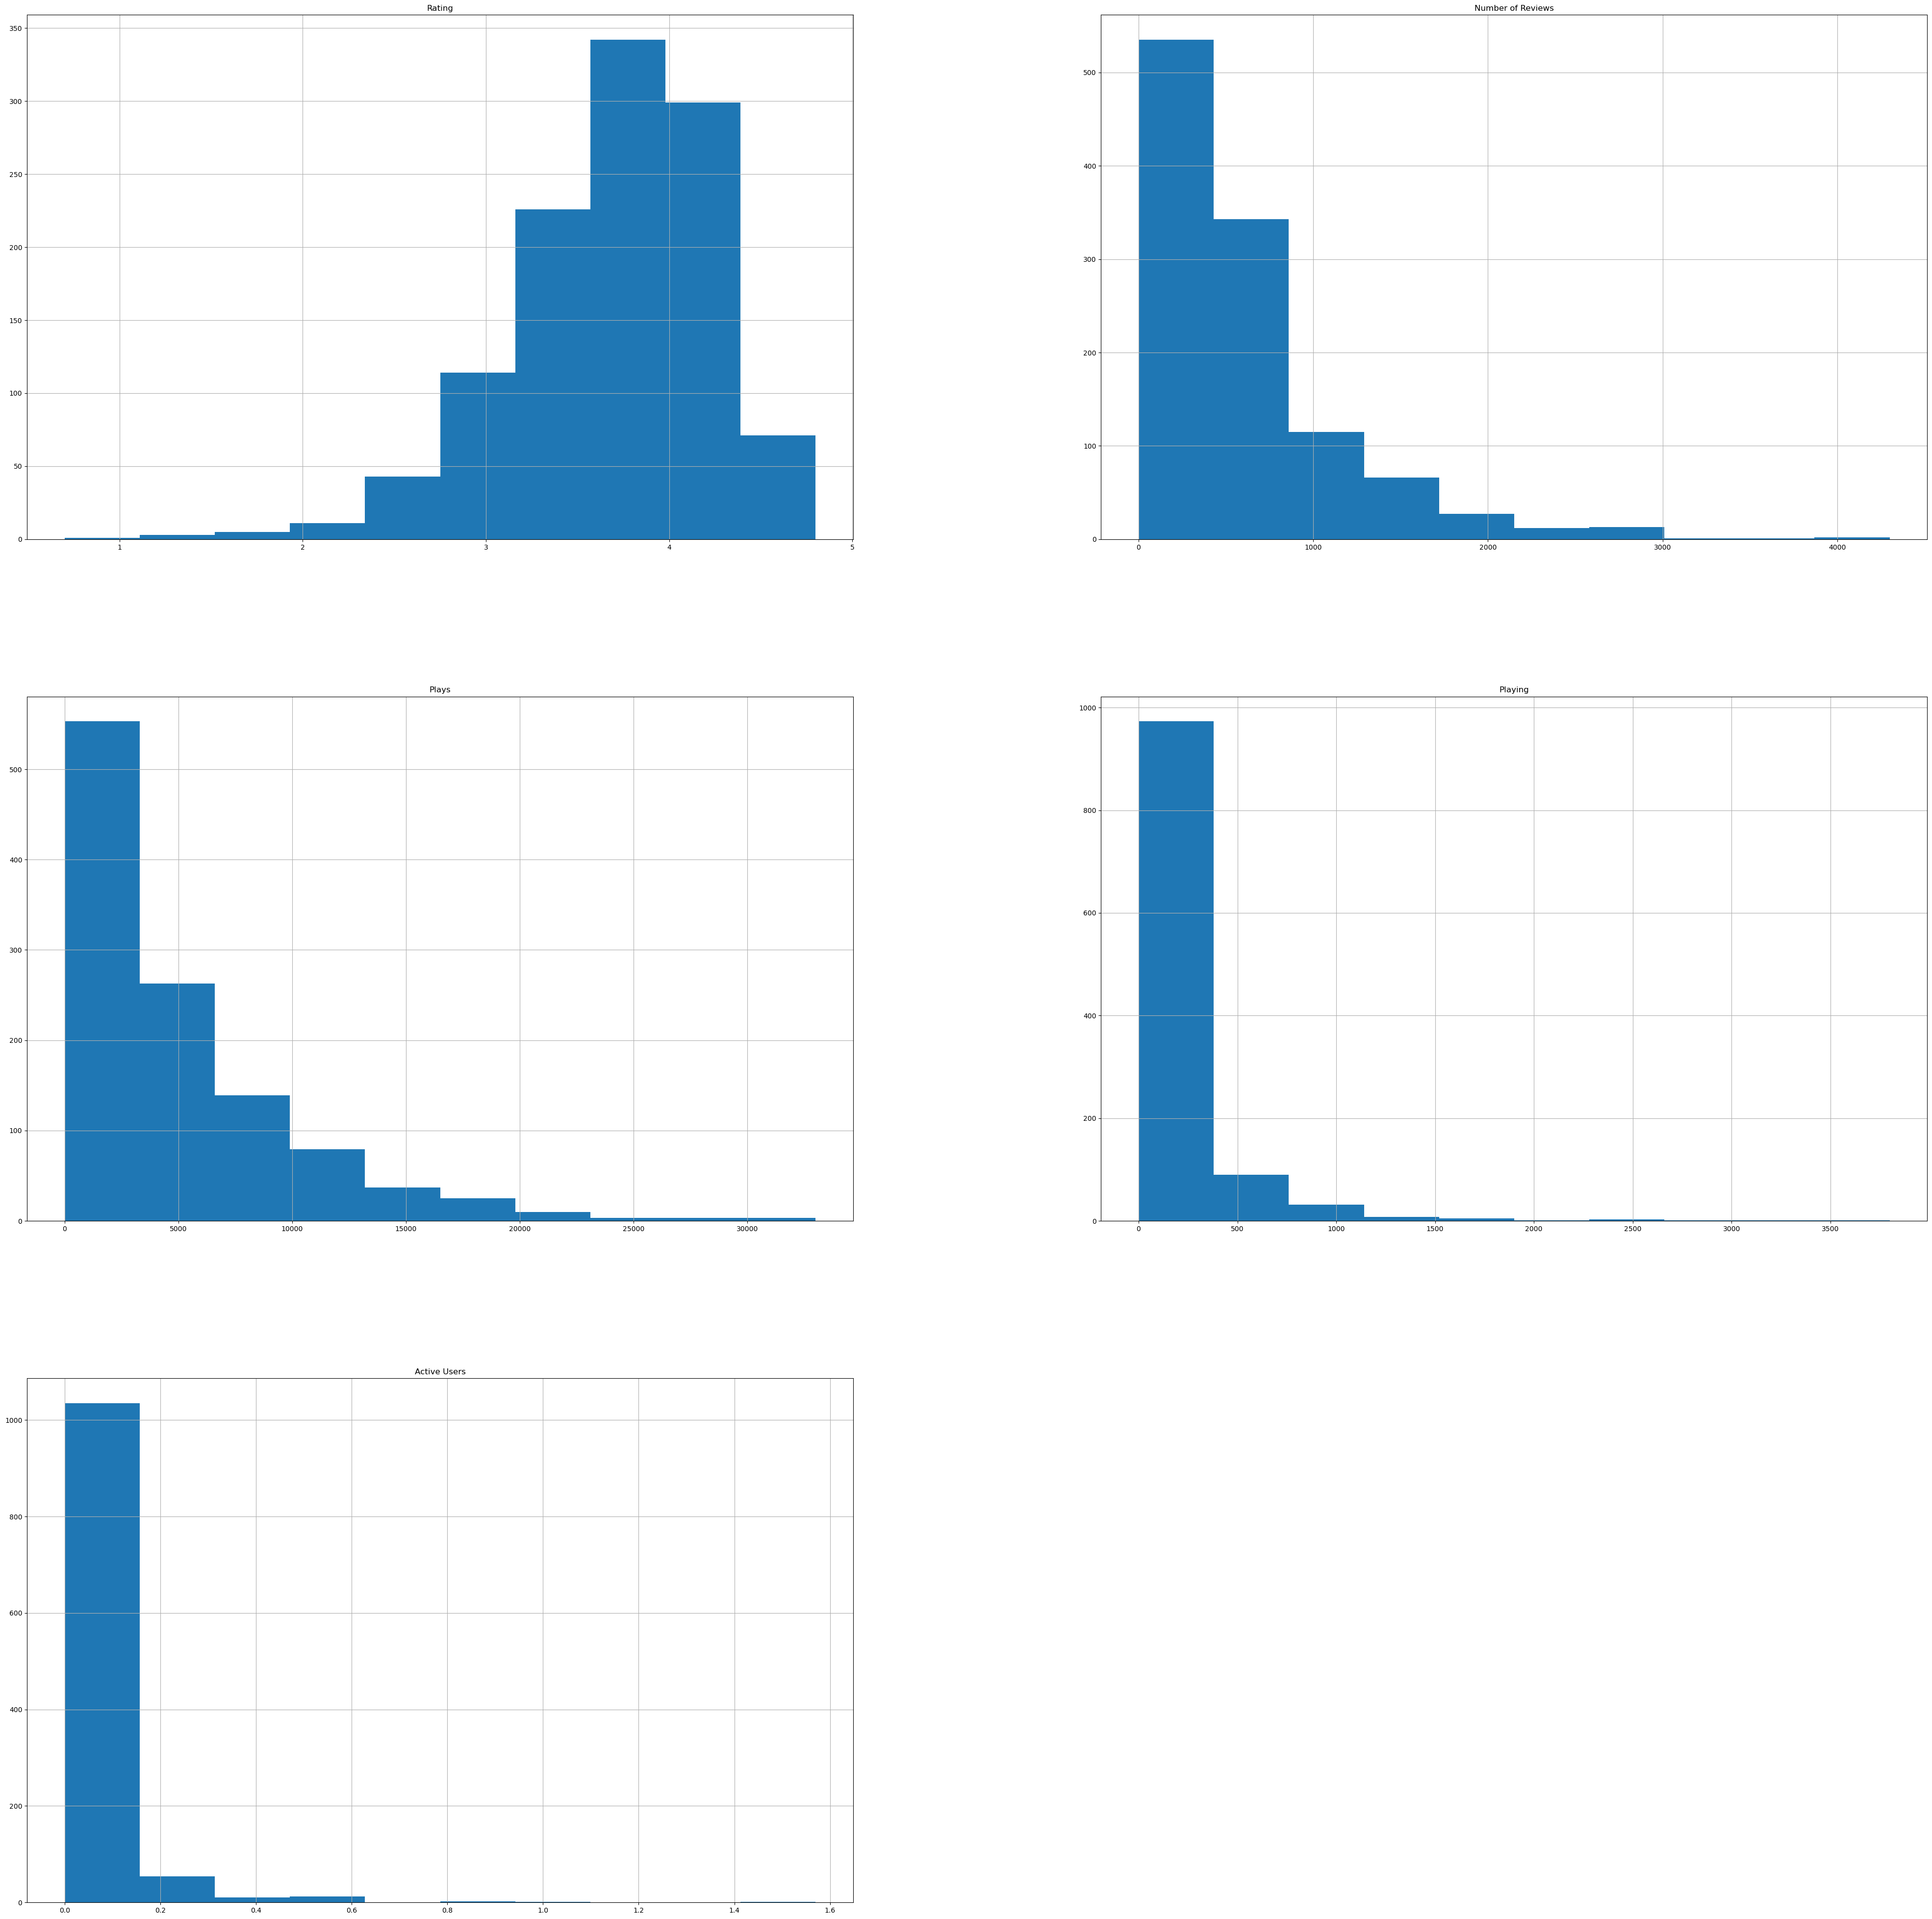

In [61]:
# plot a histogram for each numerical attribute

# check for data skewing, outliers and anomalies

histogram = games.hist(column=['Team', 'Rating', 'Number of Reviews', 'Genres', 'Plays', 'Playing', 'Active Users'], figsize=(50,50), bins=10)

# Save cleaned data to a csv file

In [62]:
# once the dataframe has been cleaned, write it to a csv file 

games_csv_data = games.to_csv('C:/Users/Mark/Documents/repos/group-coursework-ha/data/games_clean.csv', index = False)